In [312]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from shapely.geometry import *

In [264]:
path = "/Users/mustapha/Mon_disque/Machine Learning/data/coutries/coutries.shp"
gdf = gpd.read_file(path)

In [265]:
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


<Axes: >

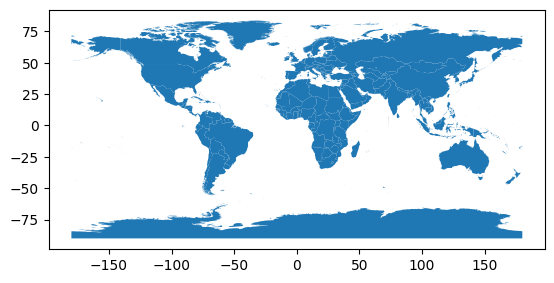

In [266]:
gdf.plot()

In [267]:
areas = gdf.to_crs(epsg=4326).area

/var/folders/fx/39y8j8751j37c9vmjzj_2ftm0000gn/T/ipykernel_41536/2795166993.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = gdf.to_crs(epsg=4326).area


In [268]:
smallest = areas.max()/4000

In [269]:
small = areas.loc[areas < smallest].index
large = gdf.loc[gdf.index.difference(small), :]

<Axes: >

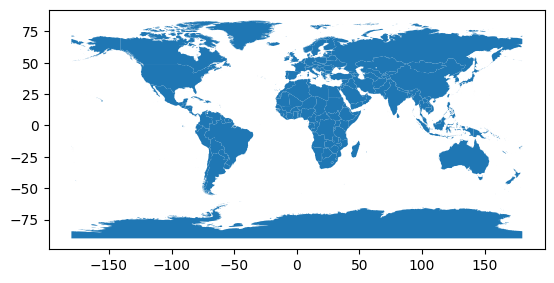

In [270]:
large.plot()

In [271]:
ys = large.centroid.geometry.y
large = large.loc[ys > ys.min(), :]

/var/folders/fx/39y8j8751j37c9vmjzj_2ftm0000gn/T/ipykernel_41536/1074946562.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ys = large.centroid.geometry.y


In [272]:
%time large = large.to_crs(epsg=3857)

CPU times: user 132 ms, sys: 4.88 ms, total: 137 ms
Wall time: 48.4 ms


<Axes: >

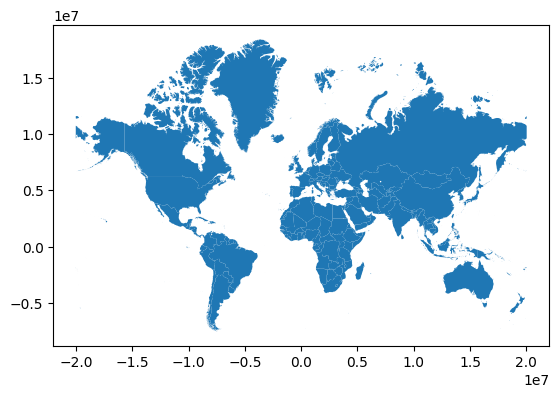

In [273]:
large.plot()

In [274]:
large.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 158 entries, 0 to 236
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int64(25), object(137)
memory usage: 209.8+ KB


In [275]:
tokeep = ["ADMIN", "geometry"]
large[tokeep].to_file('/Users/mustapha/Mon_disque/Machine Learning/data/coutries/coutries_clean.gpkg')

In [276]:
x = gpd.read_file("/Users/mustapha/Mon_disque/Machine Learning/data/coutries/coutries_clean.gpkg")

<Axes: >

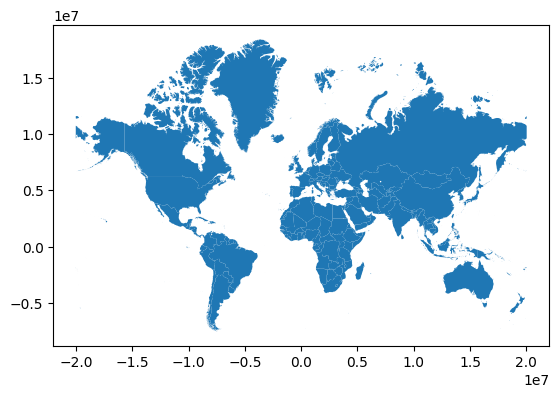

In [294]:
x.to_crs(epsg=3857).plot()

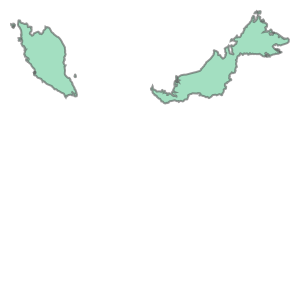

In [ ]:
x.to_crs(epsg=3857).geometry[1]

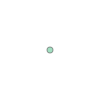

In [ ]:
MultiPolygon(x.to_crs(epsg=3857).geometry[1]).

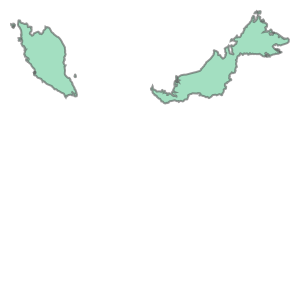

In [337]:
x.to_crs(epsg=3857).geometry[1]

In [349]:
MultiPolygon(x.to_crs(epsg=3857).geometry[1]).bounds

(11092456.047618823, 94777.60065787839, 13277975.883702096, 821100.4054068422)